# Exploratory Data Analysis (EDA)
***
## Table of Contents
1. [Importing Data](#importing_data)
2. [Data Cleaning](#data_cleaning)
3. [Data Transformation](#data_transformation)
4. [Univariate Analysis](#univariate_analysis)
5. [Bivariate Analysis](#bivariate_analysis)
***



### UK Train Rides
Mock train ticket data for National Rail in the UK, from Jan to Apr 2024, including details on the type of ticket, the date & time for each journey, the departure & arrival stations, the ticket price, and more.
Raw data(railway.csv) extracted from [Maven Analytics - Playground](https://mavenanalytics.io/data-playground)

**Transaction ID**

- Unique identifier for an individual train ticket purchase

**Date of Purchase**

- Date the ticket was purchased

**Time of Purchase**

- Time the ticket was purchased


**Purchase Type**

- Whether the ticket was purchased online or directly at a train station

**Payment Method**

- Payment method used to purchase the ticket (Contactles Credit Card or Debit Card)

**Railcard**

- Whether the passenger is a National Railcard holder (Adult Senior or Disabled) or not (None). Railcard holders get 1/3 off their ticket purchases.

**Ticket Class**

- Seat class for the ticket (Standard or First)

**Ticket Type**

- When you bought or can use the ticket. Advance tickets are 1/2 off and must be purchased at least a day prior to departure. Off-Peak tickets are 1/4 off and must be used outside of peak hours (weekdays between 6-8am and 4-6pm). Anytime tickets are full price and can be bought and used at any time during the day.

**Price**

- Final cost of the ticket

**Departure Station**

- Station to board the train

***


In [2005]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 1. Importing Data <a class="anchor" id="importing_data"></a>

In [2006]:
df = pd.read_csv('railway.csv')
df.head()

,Transaction ID,Date of Purchase,Time of Purchase,Purchase Type,Payment Method,Railcard,Ticket Class,Ticket Type,Price,Departure Station,Arrival Destination,Date of Journey,Departure Time,Arrival Time,Actual Arrival Time,Journey Status,Reason for Delay,Refund Request
0,da8a6ba8-b3dc-4677-b176,2023-12-08,12:41:11,Online,Contactless,Adult,Standard,Advance,43,London Paddington,Liverpool Lime Street,2024-01-01,11:00:00,13:30:00,13:30:00,On Time,NaN,No
1,b0cdd1b0-f214-4197-be53,2023-12-16,11:23:01,Station,Credit Card,Adult,Standard,Advance,23,London Kings Cross,York,2024-01-01,09:45:00,11:35:00,11:40:00,Delayed,Signal Failure,No
2,f3ba7a96-f713-40d9-9629,2023-12-19,19:51:27,Online,Credit Card,NaN,Standard,Advance,3,Liverpool Lime Street,Manchester Piccadilly,2024-01-02,18:15:00,18:45:00,18:45:00,On Time,NaN,No
3,b2471f11-4fe7-4c87-8ab4,2023-12-20,23:00:36,Station,Credit Card,NaN,Standard,Advance,13,London Paddington,Reading,2024-01-01,21:30:00,22:30:00,22:30:00,On Time,NaN,No
4,2be00b45-0762-485e-a7a3,2023-12-27,18:22:56,Online,Contactless,NaN,Standard,Advance,76,Liverpool Lime Street,London Euston,2024-01-01,16:45:00,19:00:00,19:00:00,On Time,NaN,No


***

## 2. Data Cleaning <a class="anchor" id="data_cleaning"></a>
- Verify data types and formats.
- Handle missing values and duplicates.
- Drop unnecessary columns if required for further analysis / modelling.

In [2007]:
df.dtypes

Transaction ID         object
Date of Purchase       object
Time of Purchase       object
Purchase Type          object
Payment Method         object
Railcard               object
Ticket Class           object
Ticket Type            object
Price                   int64
Departure Station      object
Arrival Destination    object
Date of Journey        object
Departure Time         object
Arrival Time           object
Actual Arrival Time    object
Journey Status         object
Reason for Delay       object
Refund Request         object
dtype: object

In [2008]:
df['Purchase Type'].value_counts()

Purchase Type
Online     18521
Station    13132
Name: count, dtype: int64

In [2009]:
df['Payment Method'].value_counts()

Payment Method
Credit Card    19136
Contactless    10834
Debit Card      1683
Name: count, dtype: int64

In [2010]:
df['Railcard'].value_counts()

Railcard
Adult       4846
Disabled    3089
Senior      2800
Name: count, dtype: int64

In [2011]:
df['Ticket Class'].value_counts()

Ticket Class
Standard       28595
First Class     3058
Name: count, dtype: int64

In [2012]:
df['Ticket Type'].value_counts()

Ticket Type
Advance     17561
Off-Peak     8752
Anytime      5340
Name: count, dtype: int64

In [2013]:
df['Journey Status'].value_counts()

Journey Status
On Time      27481
Delayed       2292
Cancelled     1880
Name: count, dtype: int64

In [2014]:
df['Reason for Delay'].value_counts()

Reason for Delay
Weather               995
Technical Issue       707
Signal Failure        523
Signal failure        447
Staffing              410
Staff Shortage        399
Weather Conditions    377
Traffic               314
Name: count, dtype: int64

The column `Reason for Delay` contains duplicates that are counted separately (e.g., `Weather` and `Weather Conditions`).
The merging process will proceed as follows:
- `Weather` -> `Weather Conditions`
- `Staffing` -> `Staff Shortage`
- `Signal failure` -> `Signal Failure`

In [2015]:
df['Reason for Delay'] = np.where(df['Reason for Delay']=='Weather', 'Weather Conditions', df['Reason for Delay'])
df['Reason for Delay'] = np.where(df['Reason for Delay']=='Staffing', 'Staff Shortage', df['Reason for Delay'])
df['Reason for Delay'] = np.where(df['Reason for Delay']=='Signal failure', 'Signal Failure', df['Reason for Delay'])

In [2016]:
df['Reason for Delay'].value_counts()

Reason for Delay
Weather Conditions    1372
Signal Failure         970
Staff Shortage         809
Technical Issue        707
Traffic                314
Name: count, dtype: int64

In [2017]:
df['Refund Request'].value_counts()

Refund Request
No     30535
Yes     1118
Name: count, dtype: int64

`df.dtypes` shows that most of the features are stored as the `object` datatype. Let's convert them into their appropriate datatypes. **Time of Purchase**, **Departure Time**, **Arrival Time** and **Actual Arrival Time** will be left as `object` for now.
- **Transaction ID** -> String
- **Date of Purchase** -> Datetime (only YYYY-MM-DD)
- **Purchase Type** -> Categorical (nominal)
- **Payment Method** -> Categorical (nominal)
- **Railcard** -> Categorical (nominal)
- **Ticket Class** -> Categorical (nominal)
- **Ticket Type** -> Categorical (nominal)
- **Departure Station** -> String
- **Arrival Destination** -> String
- **Date of Journey** -> Datetime (only YYYY-MM-DD)
- **Departure Time** -> Datetime
- **Arrival Time** -> Datetime
- **Actual Arrival Time** -> Datetime
- **Journey Status** -> Categorical (nominal)
- **Reason for Delay** -> Categorical (nominal)
- **Refund Request** -> Boolean (True: Yes, False: No)

In [2018]:
df['Transaction ID'] = df['Transaction ID'].astype('string')
df['Date of Purchase'] = pd.to_datetime(df['Date of Purchase'])
df['Purchase Type'] = df['Purchase Type'].astype('category')
df['Payment Method'] = df['Payment Method'].astype('category')
df['Railcard'] = df['Railcard'].astype('category')
df['Ticket Class'] = df['Ticket Class'].astype('category')
df['Ticket Type'] = df['Ticket Type'].astype('category')
df['Departure Station'] = df['Departure Station'].astype('string')
df['Arrival Destination'] = df['Arrival Destination'].astype('string')
df['Departure Time'] = pd.to_datetime(
    df['Date of Journey'] + ' ' + df['Departure Time'])
df['Arrival Time'] = pd.to_datetime(
    df['Date of Journey'] + ' ' + df['Arrival Time'])
df['Actual Arrival Time'] = pd.to_datetime(
    df['Date of Journey'] + ' ' + df['Actual Arrival Time'])
df['Date of Journey'] = pd.to_datetime(df['Date of Journey'])
df['Journey Status'] = df['Journey Status'].astype('category')
df['Reason for Delay'] = df['Reason for Delay'].astype('category')
df['Refund Request'] = df['Refund Request'].map({'Yes': True, 'No': False})

In [2019]:
# +1 day to `Arrival Time` if `Arrival Time` < `Departure Time`
df['Arrival Time'] = np.where(df['Arrival Time'] < df['Departure Time'],
                              df['Arrival Time'] + pd.Timedelta(days=1), df['Arrival Time'])

In [2020]:
# +1 day to `Actual Arrival Time` if `Actual Arrival Time` < `Departure Time`
df['Actual Arrival Time'] = np.where(
    ~df['Actual Arrival Time'].isnull() & (
        df['Actual Arrival Time'] < df['Departure Time']),
    df['Actual Arrival Time'] + pd.Timedelta(days=1),
    df['Actual Arrival Time']
)

In [2021]:
df.dtypes

Transaction ID         string[python]
Date of Purchase       datetime64[ns]
Time of Purchase               object
Purchase Type                category
Payment Method               category
Railcard                     category
Ticket Class                 category
Ticket Type                  category
Price                           int64
Departure Station      string[python]
Arrival Destination    string[python]
Date of Journey        datetime64[ns]
Departure Time         datetime64[ns]
Arrival Time           datetime64[ns]
Actual Arrival Time    datetime64[ns]
Journey Status               category
Reason for Delay             category
Refund Request                   bool
dtype: object

In [2022]:
df.isnull().sum()

Transaction ID             0
Date of Purchase           0
Time of Purchase           0
Purchase Type              0
Payment Method             0
Railcard               20918
Ticket Class               0
Ticket Type                0
Price                      0
Departure Station          0
Arrival Destination        0
Date of Journey            0
Departure Time             0
Arrival Time               0
Actual Arrival Time     1880
Journey Status             0
Reason for Delay       27481
Refund Request             0
dtype: int64

20918 , 1880, 27481 null values were detected in the `Railcard`, `Actual Arrival Time`, `Reason for Delay` columns respectively.

In [2023]:
df[df['Actual Arrival Time'].isnull()]['Journey Status'].value_counts()

Journey Status
Cancelled    1880
Delayed         0
On Time         0
Name: count, dtype: int64

In [2024]:
df[df['Reason for Delay'].isnull()]['Journey Status'].value_counts()

Journey Status
On Time      27481
Cancelled        0
Delayed          0
Name: count, dtype: int64

For the `Railcard` column, let's assume there are 4 types of card - Youth, Adult, Disabled and Senior. Null values will be replaced with `Youth`.

In [2025]:
df['Railcard'] = df['Railcard'].cat.add_categories('Youth')
df['Railcard'] = df['Railcard'].fillna('Youth')
df['Railcard'].value_counts()

Railcard
Youth       20918
Adult        4846
Disabled     3089
Senior       2800
Name: count, dtype: int64

All null values in the `Actual Arrival Time` column are due to cancellations. These null values will be replaced with `Departure Time`.

In [2026]:
df['Actual Arrival Time'] = df['Actual Arrival Time'].fillna(
    df['Departure Time'])
df['Actual Arrival Time'].isnull().sum()

np.int64(0)

 Similarly, null values in the `Reason for Delay` column occur only when the `Journey Status` is `On Time`. These will be replaced with `Not Delayed`.

In [2027]:
df['Reason for Delay'] = df['Reason for Delay'].cat.add_categories(
    'Not Delayed')
df['Reason for Delay'] = df['Reason for Delay'].fillna('Not Delayed')
df['Reason for Delay'].isnull().sum()

np.int64(0)

In [2028]:
df.isnull().sum()

Transaction ID         0
Date of Purchase       0
Time of Purchase       0
Purchase Type          0
Payment Method         0
Railcard               0
Ticket Class           0
Ticket Type            0
Price                  0
Departure Station      0
Arrival Destination    0
Date of Journey        0
Departure Time         0
Arrival Time           0
Actual Arrival Time    0
Journey Status         0
Reason for Delay       0
Refund Request         0
dtype: int64

## 3. Feature Engineering <a class="anchor" id="feature_engineering"></a>
- Normalise or standardise numerical variables if necessary for further analysis / modelling.
- Encode categorical variables if necessary.
- Create new features from existing ones.

In this analysis, there is no need of normalising, standarsing numerical variables or encoding categorical variables as creating machine learning models is not a part of this project. Instead, a couple of new features will be created: `Days Before Depature`, `Travel Time`, and `Delayed Time`.


**Days Before Departure**
- Number of days in advance passengers purchased their tickets before departure, calculated as the difference between `Date of Purchase` and `Date of Journey`.

**Travel Time**
- Total travel time in minutes, calculated as the difference between `Departure Time` and `Actual Arrival Time`.

**Delayed Time**

- Delay duration in minutes for delayed trains, calculated as the difference between `Arrival Time` and `Actual Arrival Time`.

In [2029]:
# Create `Days Before Departure`
df['Days Before Departure'] = (
    df['Date of Journey'] - df['Date of Purchase']).dt.days

# Create `Travel Time`
# Convert to datetime format -> Calculate in minutes -> Handle null values and convert to int
df['Travel Time'] = (df['Actual Arrival Time'] -
                     df['Departure Time']).dt.total_seconds()/60
df['Travel Time'] = df['Travel Time'].fillna(0).astype(int)

# Create `Delayed Time` in minutes
df['Delayed Time'] = np.where(df['Journey Status'] == 'Delayed',
                              (df['Actual Arrival Time'] - df['Arrival Time']).dt.seconds/60, 0)
df['Delayed Time'] = df['Delayed Time'].astype(int)

In [2030]:
df.head()

,Transaction ID,Date of Purchase,Time of Purchase,Purchase Type,Payment Method,Railcard,Ticket Class,Ticket Type,Price,Departure Station,...,Date of Journey,Departure Time,Arrival Time,Actual Arrival Time,Journey Status,Reason for Delay,Refund Request,Days Before Departure,Travel Time,Delayed Time
0,da8a6ba8-b3dc-4677-b176,2023-12-08,12:41:11,Online,Contactless,Adult,Standard,Advance,43,London Paddington,...,2024-01-01,2024-01-01 11:00:00,2024-01-01 13:30:00,2024-01-01 13:30:00,On Time,Not Delayed,False,24,150,0
1,b0cdd1b0-f214-4197-be53,2023-12-16,11:23:01,Station,Credit Card,Adult,Standard,Advance,23,London Kings Cross,...,2024-01-01,2024-01-01 09:45:00,2024-01-01 11:35:00,2024-01-01 11:40:00,Delayed,Signal Failure,False,16,115,5
2,f3ba7a96-f713-40d9-9629,2023-12-19,19:51:27,Online,Credit Card,Youth,Standard,Advance,3,Liverpool Lime Street,...,2024-01-02,2024-01-02 18:15:00,2024-01-02 18:45:00,2024-01-02 18:45:00,On Time,Not Delayed,False,14,30,0
3,b2471f11-4fe7-4c87-8ab4,2023-12-20,23:00:36,Station,Credit Card,Youth,Standard,Advance,13,London Paddington,...,2024-01-01,2024-01-01 21:30:00,2024-01-01 22:30:00,2024-01-01 22:30:00,On Time,Not Delayed,False,12,60,0
4,2be00b45-0762-485e-a7a3,2023-12-27,18:22:56,Online,Contactless,Youth,Standard,Advance,76,Liverpool Lime Street,...,2024-01-01,2024-01-01 16:45:00,2024-01-01 19:00:00,2024-01-01 19:00:00,On Time,Not Delayed,False,5,135,0


## 4. Univariate Analysis <a class="anchor" id="univariate_analysis"></a>
- Analyse each variable separately in the dataset.
- Use descriptive statistics.
- Calculate range, mean, median, mode, quartiles, etc.
- Visualise with matplotlib and seaborn.



In [2031]:
df.describe()

,Date of Purchase,Price,Date of Journey,Departure Time,Arrival Time,Actual Arrival Time,Days Before Departure,Travel Time,Delayed Time
count,31653,31653.000000,31653,31653,31653,31653,31653.000000,31653.000000,31653.000000
mean,2024-02-28 16:16:36.303667968,23.439200,2024-03-01 08:01:10.969576192,2024-03-01 20:03:02.826272256,2024-03-01 21:14:12.080371456,2024-03-01 21:13:00.851104256,1.655957,69.967081,3.056677
min,2023-12-08 00:00:00,1.000000,2024-01-01 00:00:00,2024-01-01 00:00:00,2024-01-01 00:30:00,2024-01-01 00:30:00,0.000000,0.000000,0.000000
25%,2024-01-30 00:00:00,5.000000,2024-01-31 00:00:00,2024-01-31 08:00:00,2024-01-31 09:20:00,2024-01-31 09:20:00,0.000000,30.000000,0.000000
50%,2024-03-01 00:00:00,11.000000,2024-03-01 00:00:00,2024-03-01 22:15:00,2024-03-02 00:05:00,2024-03-02 00:05:00,1.000000,80.000000,0.000000
75%,2024-03-31 00:00:00,35.000000,2024-03-31 00:00:00,2024-03-31 13:15:00,2024-03-31 14:20:00,2024-03-31 14:20:00,1.000000,90.000000,0.000000
max,2024-04-30 00:00:00,267.000000,2024-04-30 00:00:00,2024-04-30 23:45:00,2024-05-01 01:45:00,2024-05-01 01:45:00,28.000000,288.000000,180.000000
std,NaN,29.997628,NaN,NaN,NaN,NaN,3.853255,42.789410,14.345747


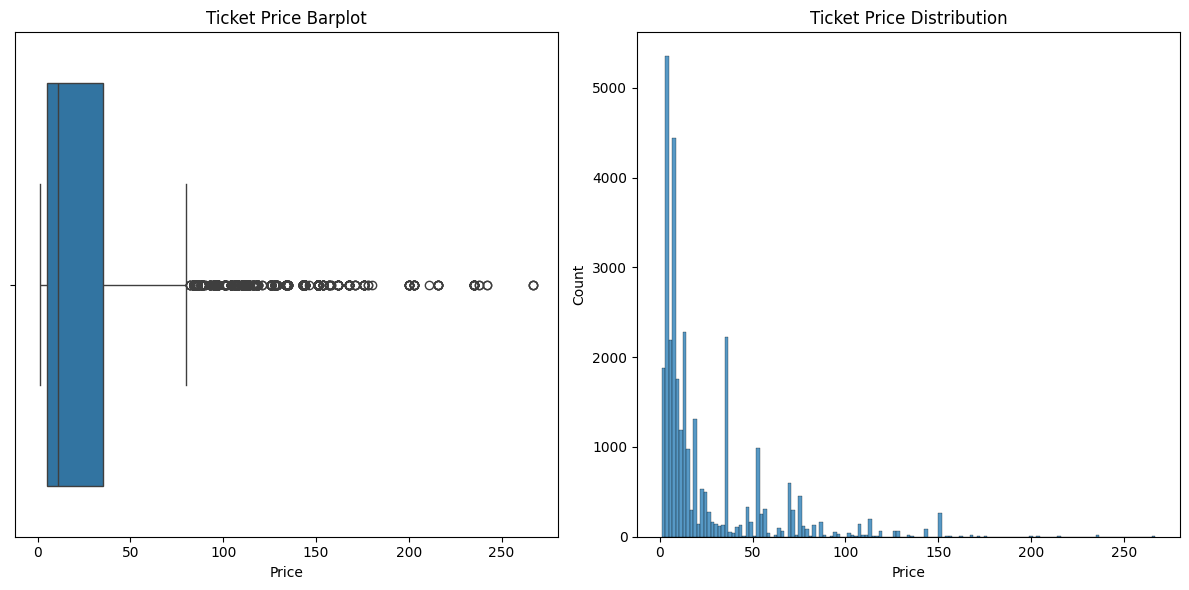

In [2032]:
# Create a barplot and a hisplot for the column `Price`.
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

axes[0].set_title('Ticket Price Barplot')
sns.boxplot(x=df['Price'], ax=axes[0])

axes[1].set_title('Ticket Price Distribution')
sns.histplot(x=df['Price'], ax=axes[1])
plt.tight_layout()
plt.show()

### Interquartile Range (IQR) and Outliers
- The middle 50% values in the dataset, which is simply the difference between the third quartile(Q3: 75% percentile) and the first quartile(Q1: 25% percentile).
- The outlier are the values below `Q1-1.5*IQR` or above `Q3+1.5*IQR`.

In [2033]:
q1, q3 = np.quantile(df['Price'], 0.25), np.quantile(df['Price'], 0.75)
iqr = q3 - q1

below_threshold = q1 - 1.5 * iqr
above_threshold = q3 + 1.5 * iqr

outliers = df[(df['Price'] > above_threshold) |
              (df['Price'] < below_threshold)]

In [2034]:
print(
    f"The outliers range from £{min(outliers['Price'])} to £{max(outliers['Price'])}.")
print(f"There are {len(outliers)} outliers which account for {len(outliers)/len(df):.2f}% of the entire dataset.")

The outliers range from £82 to £267.
There are 1555 outliers which account for 0.05% of the entire dataset.


The ticket price ranges from £1 to £267, offering customers a wide variety of options accomodating different budgets. The significant difference between the average price (£23.4) and the median price (£11.0) indicates a right-skewed distribution, driven by some extremely higher ticket prices that are less common. This skewness demonstrated how the mean is sensitive to outlayers. 

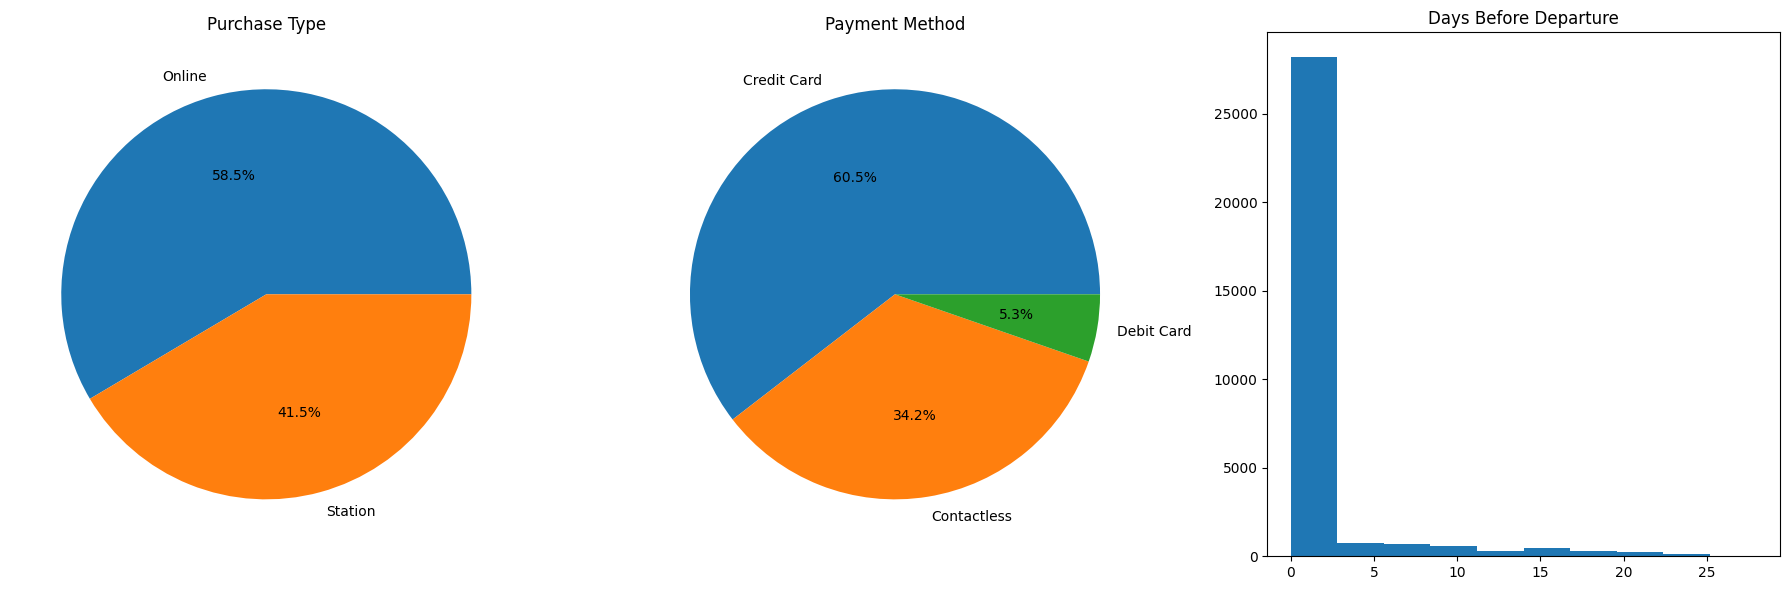

0 or 1 day before departure: 87.94%
 7+ days before departure: 7.01%


In [2035]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
purchase_type_counts = df['Purchase Type'].value_counts()
axes[0].set_title('Purchase Type')
axes[0].pie(purchase_type_counts,
            labels=purchase_type_counts.index, autopct='%1.1f%%')


payment_method_counts = df['Payment Method'].value_counts()
axes[1].set_title('Payment Method')
axes[1].pie(payment_method_counts,
            labels=payment_method_counts.index, autopct='%1.1f%%')

axes[2].set_title('Days Before Departure')
axes[2].hist(df['Days Before Departure'])
plt.tight_layout()
plt.show()

days_before_dep_counts = df['Days Before Departure'].value_counts()
print(f"0 or 1 day before departure: {days_before_dep_counts[:2].sum()/len(df)*100:.2f}%")
print(f" 7+ days before departure: {days_before_dep_counts[8:].sum()/len(df)*100:.2f}%")


The statistic show that over half of the customers purchased their tickets online. 60.5% of people used their credit cards for payment, 34.2% chose to pay using contactless methods(Apple Pay or Google Play), and only 5.3% used debit cards. 87.9% of customers purchased their tickets on the day of departure or the following day, and only 7% of customers purchased their tickets more than a week before their trip.

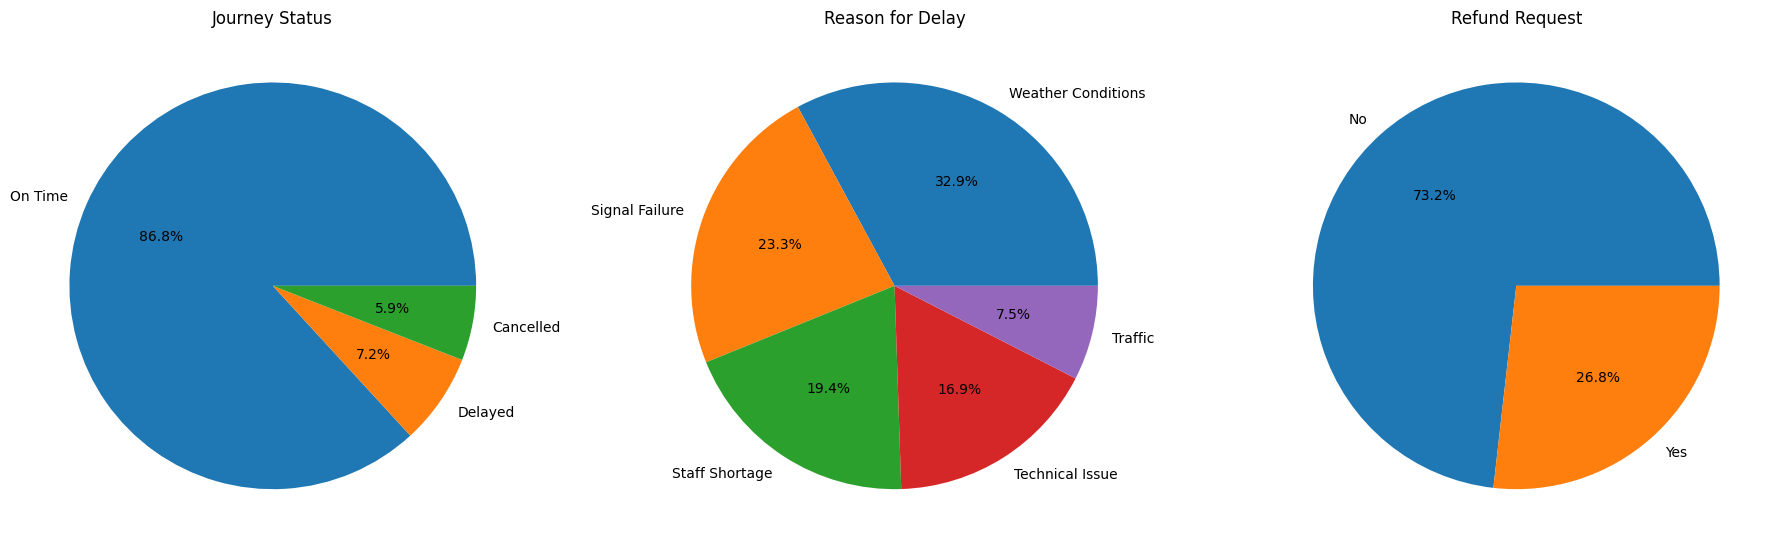

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Journey Status
journey_status_counts = df['Journey Status'].value_counts()
axes[0].set_title('Journey Status')
axes[0].pie(journey_status_counts,
            labels=journey_status_counts.index, autopct='%1.1f%%')

# Reason for Delay
cancelled_or_delayed = df['Journey Status'].isin(['Cancelled', 'Delayed'])
reason_delay_counts = df[cancelled_or_delayed]['Reason for Delay'].value_counts(ascending=False)
reason_delay_counts = reason_delay_counts.drop('Not Delayed') # Drop 'Not Delayed'
axes[1].set_title('Reason for Delay')
axes[1].pie(reason_delay_counts, labels=reason_delay_counts.index, autopct='%1.1f%%')

# Refund Request (True: Yes, False: No)
refund_counts = df[cancelled_or_delayed]['Refund Request'].map({True: 'Yes', False: 'No'}).value_counts()
axes[2].set_title('Refund Request')
axes[2].pie(refund_counts, labels=refund_counts.index, autopct='%1.1f%%')
plt.tight_layout()
plt.show()

The first graph shows that 86.8% of trains arrived on time, while 7.2% were delayed and 5.9% were cancelled. The top 3 reasons for delays or cancellations were: `Weather Conditions`(32.9%), `Signal Failure`(23.3%), and `Staff Shortage`(19.4%). Among passengers whose train were either cancelled or delayed, only 26.8 requested a refund.

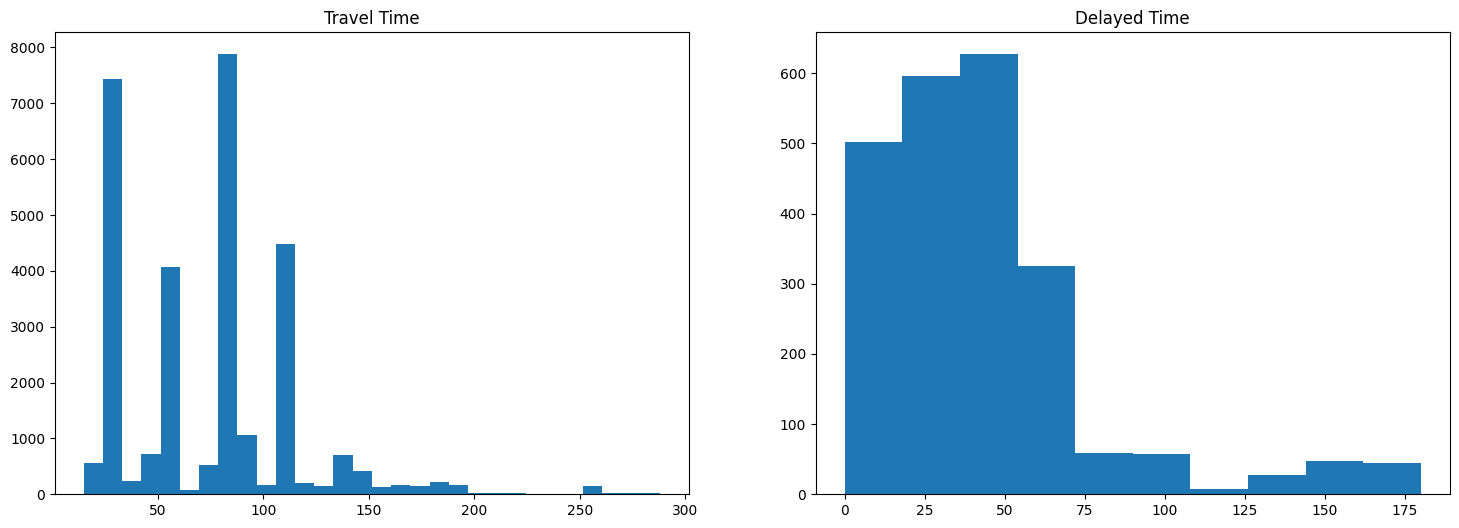

In [2056]:
on_time_or_delayed = df[df['Journey Status'].isin(['On Time', 'Delayed'])]
delayed=df[df['Journey Status'] == 'Delayed']
# Travel Time
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
axes[0].set_title('Travel Time')
axes[0].hist(on_time_or_delayed['Travel Time'], bins=30)

# Delayed Time
axes[1].set_title('Delayed Time')
axes[1].hist(delayed['Delayed Time'])
plt.show()

In [2075]:
print(f"Travel time min: {min(on_time_or_delayed['Travel Time'])}, max: {max(on_time_or_delayed['Travel Time'])}")
print(f"Average: {np.mean(on_time_or_delayed['Travel Time']):.0f}, median: {np.median(on_time_or_delayed['Travel Time']):.0f}")
print(f"Delayed time min: {min(delayed['Delayed Time'])}, max: {max(delayed['Delayed Time'])}")
print(f"Average: {np.mean(delayed['Delayed Time']):.0f}, median: {np.median(delayed['Delayed Time']):.0f}")


Travel time min: 15, max: 288
Average: 74, median: 80
Delayed time min: 0, max: 180
Average: 42, median: 37


The travel duration ranges from 15 minutes to 288 minutes. The average and median travel times are 74 minutes and 80 minutes respectively.
When trains were delayed, they arrived at their destination between 0 and 180 minutes later than the scheduled arrival time, with an average delay of 42 minutes and a median delay of 37 minutes.

## 5. Bivariate Analysis <a class="anchor" id="bivariate_analysis"></a>
- Analyse the relationships between two different variables.
- Examine correlation.
- Visualise with matplotlib and seaborn (scatter plots, line plots, heatmap, etc.).

<Axes: xlabel='Price', ylabel='Travel Time'>

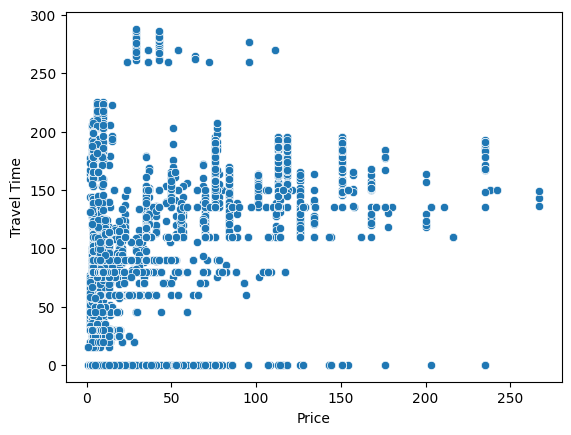

In [2077]:
sns.scatterplot(x=df['Price'], y=df['Travel Time'])